In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
cancer = load_breast_cancer()
iris = load_iris()
wine = load_wine()

## Bagging 을 사용한 분류

- Bagging은 bootstrap aggregating의 줄임말
- 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
- 각각의 결과를 결합해 최종 결과를 생성
- 분산을 줄이고 과적합을 막음
- 강력하고 복잡한 모델에서 잘 동작

### KNN

In [6]:
base_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [8]:
cross_val = cross_validate(estimator = base_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0019376754760742187 (+/- 0.000635392704291384)
avg score time : 0.007961750030517578 (+/- 0.002615977780356704)
avg test score : 0.9648501785437045 (+/- 0.009609970350036127)


In [9]:
cross_val = cross_validate(estimator = bagging_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03210463523864746 (+/- 0.020099809980369632)
avg score time : 0.014757490158081055 (+/- 0.001175350325346464)
avg test score : 0.9666200900481291 (+/- 0.012867010404453715)


### SVC

In [10]:
base_model = make_pipeline(StandardScaler(), SVC())

bagging_model = BaggingClassifier(base_model, n_estimators= 10, max_samples = 0.5, max_features = 0.5)

In [11]:
cross_val = cross_validate(estimator = base_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.019209957122802733 (+/- 0.02748224858806769)
avg score time : 0.002606105804443359 (+/- 0.0008092256223475037)
avg test score : 0.9736376339077782 (+/- 0.014678541667933545)


In [12]:
cross_val = cross_validate(estimator = bagging_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.036819171905517575 (+/- 0.009885914913470422)
avg score time : 0.011606550216674805 (+/- 0.0010077388732721447)
avg test score : 0.968390001552554 (+/- 0.011862304695158518)


### Decision Tree

In [13]:
base_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = 0.5, max_features = 0.5)

In [14]:
cross_val = cross_validate(estimator = base_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.016427993774414062 (+/- 0.01451166635863602)
avg score time : 0.0012705802917480468 (+/- 0.0011496548373784343)
avg test score : 0.9103244837758112 (+/- 0.017303100601016346)


In [16]:
cross_val = cross_validate(estimator = bagging_model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.04114656448364258 (+/- 0.01588193530619989)
avg score time : 0.0031009197235107424 (+/- 0.0014903144429790453)
avg test score : 0.9613569321533924 (+/- 0.01047224973457601)


## RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())

In [19]:
cross_val = cross_validate(estimator = model, X = iris.data, y = iris.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.16425113677978515 (+/- 0.07869094652353181)
avg score time : 0.010165977478027343 (+/- 0.002628760561500391)
avg test score : 0.9666666666666668 (+/- 0.02108185106778919)


In [20]:
cross_val = cross_validate(estimator = model, X = wine.data, y = wine.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.16261558532714843 (+/- 0.09144707606703631)
avg score time : 0.01250314712524414 (+/- 0.008559126743112133)
avg test score : 0.9888888888888889 (+/- 0.022222222222222233)


In [21]:
cross_val = cross_validate(estimator = model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.29647326469421387 (+/- 0.11215759750953404)
avg score time : 0.01457042694091797 (+/- 0.005340970936728621)
avg test score : 0.9666356155876418 (+/- 0.02028442485129542)


## AdaBoost

- 대표적인 부스팅 알고리즘
- 일련의 약한 모델들을 학습
- 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
- 가중치 투표 (또는 합)을 통해 각 모델의 예측값을 결합
- 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
    - 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
    - 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

In [24]:
cross_val = cross_validate(estimator = model, X = iris.data, y = iris.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.0786087989807129 (+/- 0.04480540785619043)
avg score time : 0.006535005569458008 (+/- 0.0004561087725326263)
avg test score : 0.9466666666666667 (+/- 0.03399346342395189)


In [25]:
cross_val = cross_validate(estimator = model, X = wine.data, y = wine.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.10379467010498047 (+/- 0.028750365054325874)
avg score time : 0.007379865646362305 (+/- 0.002039214244726594)
avg test score : 0.8085714285714285 (+/- 0.16822356718459935)


In [26]:
cross_val = cross_validate(estimator = model, X = cancer.data, y = cancer.target, cv = 5)

print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.11814327239990234 (+/- 0.01668876199561833)
avg score time : 0.006788063049316406 (+/- 0.0009837592198697763)
avg test score : 0.9701133364384411 (+/- 0.019709915473893072)


## Voting Classifier

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
    - 가장 많이 예측된 클래스를 정답으로 채택 (Hard Voting)
    - 예측된 확률의 가중치 평균 (Soft Voting)

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [29]:
# Hard voting
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()

vote_model = VotingClassifier(estimators = [("svc", model1), ("naive", model2), ("forest", model3)], voting = 'hard')

In [30]:
for model in (model1, model2, model3, vote_model):
    print(type(model))

<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.naive_bayes.GaussianNB'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.ensemble._voting.VotingClassifier'>


In [34]:
for model in (model1, model2, model3, vote_model):
    split1 = str(type(model)).split('.')[-1]
    print(split1.split("'")[0])

SVC
GaussianNB
RandomForestClassifier
VotingClassifier


In [36]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    score = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy : %.2f (+/- %.2f) [%s]' % (score.mean(), score.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


In [37]:
# Soft voting
model1 = SVC(probability = True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(estimators = [('svc', model1), ('navie', model2), ('forest', model3)], voting = 'soft', weights = [2,1,2])

In [38]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    score = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy : %.2f (+/- %.2f) [%s]' % (score.mean(), score.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


## XGBoost

- 트리 기반의 앙상블 기법
- 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
- XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행시간과 과적합 규제 부재 등의 문제를 해결
- 병렬 CPU 환경에서 빠르게 학습 가능
- kaggle 도전 데이터 과학자에서 5년 연속 1위한 알고리즘

In [43]:
#!pip install xgboost

In [45]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .2, random_state = 123)

In [50]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

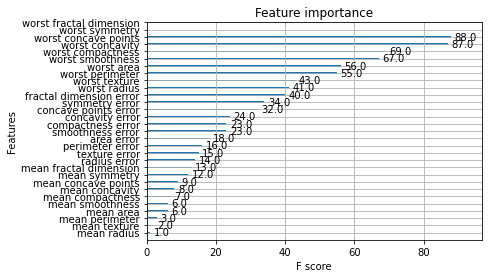

In [51]:
# 중요 변수 확인 및 시각화 : y에 영향을 미치는 변수
plot_importance(xgbc)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.show()

In [53]:
y_pred = xgbc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

